## Miepython test

In [2]:
import numpy as np
import miepython as mp
import matplotlib.pyplot as pl
import matplotlib.style as mplstyle
import seaborn as sns
from scipy.stats import rv_discrete

mplstyle.use('seaborn')
# sns.set_style('white')

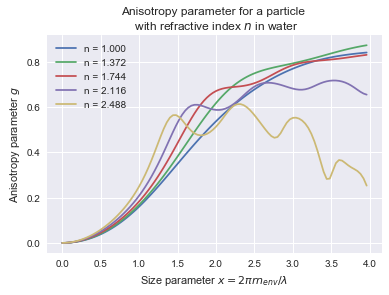

In [3]:
# m = 2.488
m_env = 1.33
m = np.linspace(1.0, 2.488, 5)
wavelength = 632.8E-3
r = np.linspace(0, 300, 100) * 1.0E-3
x = r * 2 * np.pi * m_env / wavelength
for m_ in m:
    qext, qsca, qback, g = mp.mie(m_/m_env, x)
    pl.plot(x, g, label=f'n = {m_:.3f}')
# qext, qsca, qback, g = mp.mie(m/m_env, x)
# pl.plot(x, g, label=f'n = {2.488-1.333}')
pl.ylabel(r'Anisotropy parameter $g$')
pl.xlabel(r'Size parameter $x = 2 \pi r n_{env}/ \lambda$')
pl.title('Anisotropy parameter for a particle \n with refractive index $n$ in water')
pl.legend(loc='best')
pl.savefig('anisotropy.png', dpi=300)

In [8]:
macheps = np.finfo(np.float).eps * 10
# print(g)
x0 = x[np.where(np.abs(g - 0.55) < 1.0E-2)]
r0 = r[np.where(np.abs(g - 0.55) < 1.0E-2)]
# r0 = np.amax(r0)
print(x0)
print(r0)

[1.40061619 1.52066901 1.56068662 2.08091549 2.52110915 2.96130281
 3.00132042 3.04133802 3.08135563 3.12137323]
[0.10606061 0.11515152 0.11818182 0.15757576 0.19090909 0.22424242
 0.22727273 0.23030303 0.23333333 0.23636364]


NameError: name 'g' is not defined

In [27]:
m_env

1.33

In [28]:
theta = np.linspace(-180,180,1000)
mu = np.cos(theta/180*np.pi)
x0 = r0 * 2 * np.pi * m_env / wavelength
scat = mp.i_unpolarized(m,x0,mu)
# normalize scat over area
scat = scat / np.sum(scat)
print(scat.shape)
qext, qsca, qback, g = mp.mie(m/m_env,x)

(1000,)


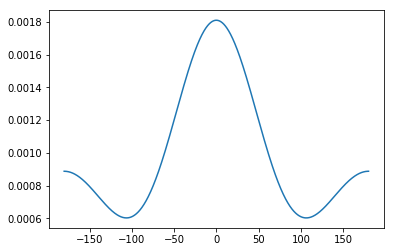

In [29]:
pl.plot(theta, scat, label='Mie')

In [8]:
pts = np.random.choice(theta, size=180, p=scat)

(array([2., 3., 0., 3., 1., 1., 1., 3., 2., 1., 1., 1., 3., 0., 3., 1., 0.,
        1., 3., 3., 8., 1., 5., 3., 5., 6., 7., 6., 4., 7., 6., 9., 6., 4.,
        4., 3., 1., 6., 5., 2., 5., 3., 1., 3., 2., 5., 1., 1., 3., 2., 0.,
        0., 4., 2., 3., 3., 1., 4., 2., 4.]),
 array([-177.83783784, -171.96396396, -166.09009009, -160.21621622,
        -154.34234234, -148.46846847, -142.59459459, -136.72072072,
        -130.84684685, -124.97297297, -119.0990991 , -113.22522523,
        -107.35135135, -101.47747748,  -95.6036036 ,  -89.72972973,
         -83.85585586,  -77.98198198,  -72.10810811,  -66.23423423,
         -60.36036036,  -54.48648649,  -48.61261261,  -42.73873874,
         -36.86486486,  -30.99099099,  -25.11711712,  -19.24324324,
         -13.36936937,   -7.4954955 ,   -1.62162162,    4.25225225,
          10.12612613,   16.        ,   21.87387387,   27.74774775,
          33.62162162,   39.4954955 ,   45.36936937,   51.24324324,
          57.11711712,   62.99099099,   68.864

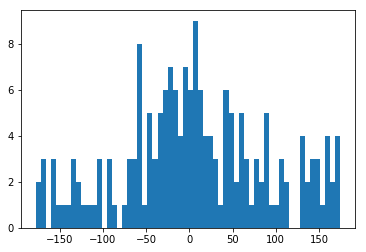

In [9]:
pl.hist(pts, bins=60)